1. 株価の時間の変化を見る
2. 日毎の変動を可視化する
3. 移動平均を見る
4. 複数の株価の終値の創刊を計算する
5. 複数の株価の変動の関係を見る
6. 特定の株のリスクを計算する
7. シミュレーションを使った未来の予測

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas_datareader import DataReader

from datetime import datetime

In [3]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year - 1,end.month, end.day)

for stock in tech_list:
    # それぞれの名前でDataFrameを作る
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [4]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000
mean,194.324480,190.407960,192.303800,192.403440,3.184882e+07,191.201346
std,21.555839,21.494869,21.435826,21.497989,1.351437e+07,21.886026
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.505798
25%,175.902496,173.362499,174.737499,174.757500,2.194270e+07,173.279305
50%,198.750000,193.805000,196.364998,196.345001,2.824650e+07,195.165611
75%,209.089996,205.104996,207.449997,207.479996,3.854895e+07,206.476418
max,238.130005,234.880005,236.389999,236.410004,9.574460e+07,236.410004


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2018-10-22 to 2019-10-18
Data columns (total 6 columns):
High         250 non-null float64
Low          250 non-null float64
Open         250 non-null float64
Close        250 non-null float64
Volume       250 non-null float64
Adj Close    250 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


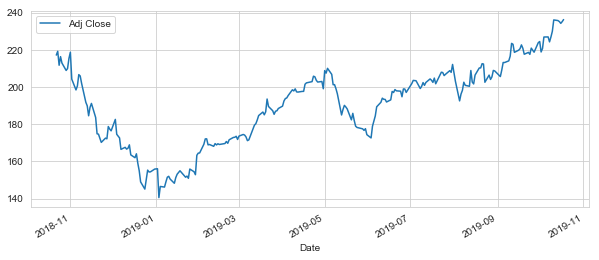

In [6]:
# 終値の時系列をプロット
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

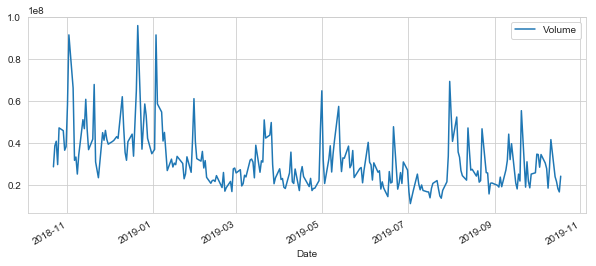

In [7]:
# 出来高(1日に取引が成立した株の数)をプロット
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [8]:
# 間隔ごとに移動平均を描く
ma_day = [10,20,50]

for ma in ma_day:
    column_name = f"MA {ma}"
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()

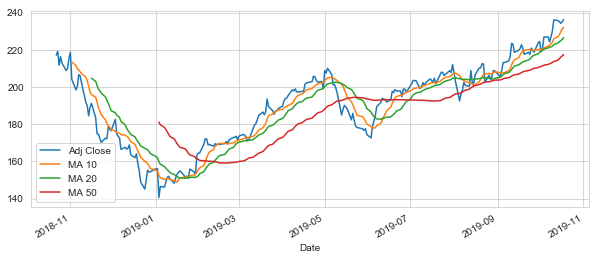

In [9]:
AAPL[['Adj Close','MA 10','MA 20','MA 50']].plot(subplots=False,figsize=(10,4))

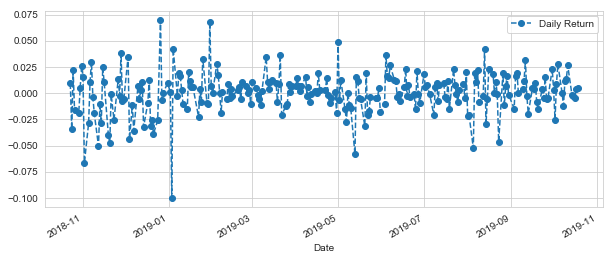

In [10]:
# 日毎の変動
# pct_changeを使うと変化の割合を計算できる
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# 変化率をプロット
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


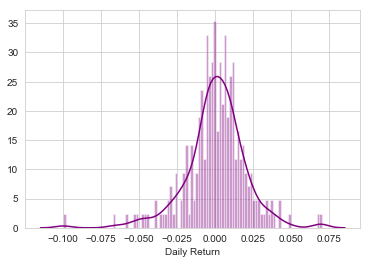

In [11]:
# 前日比(%)のヒストグラムを描く
# NaNを取り除く
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [12]:
# ハイテク4社の株価を1つのDataFrameにまとめる
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [13]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-10-22,217.278320,1789.300049,1101.160034,107.933945
2018-10-23,219.326538,1768.699951,1103.689941,106.427612
2018-10-24,211.803284,1664.199951,1050.709961,100.737038
2018-10-25,216.441330,1782.170044,1095.569946,106.624535
2018-10-26,212.994797,1642.810059,1071.469971,105.305260


In [14]:
# 終値の日毎の変化を計算する
tech_rets = closing_df.pct_change()

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


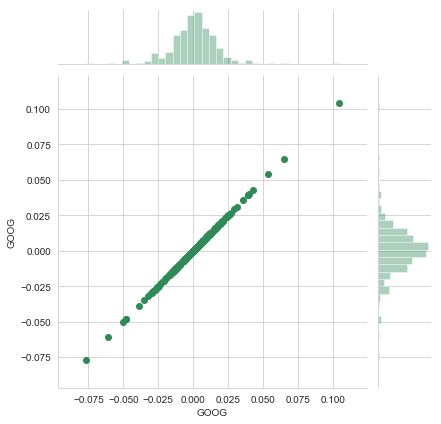

In [15]:
# Google同士の相関
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


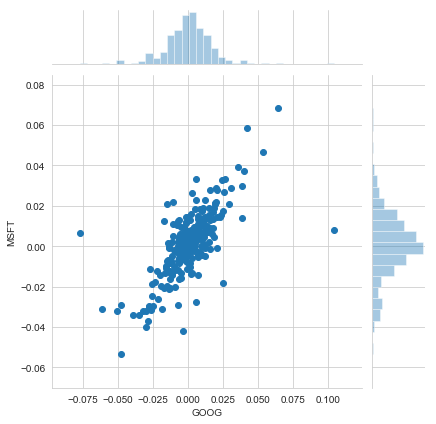

In [16]:
# 別の会社同士の相関
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

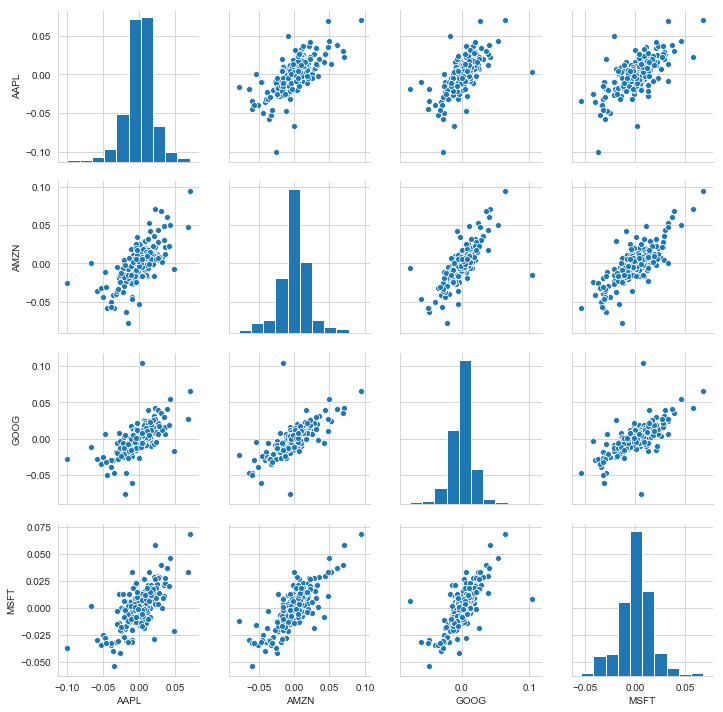

In [17]:
# 2社の比較を全社対象で行う
sns.pairplot(tech_rets.dropna())

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


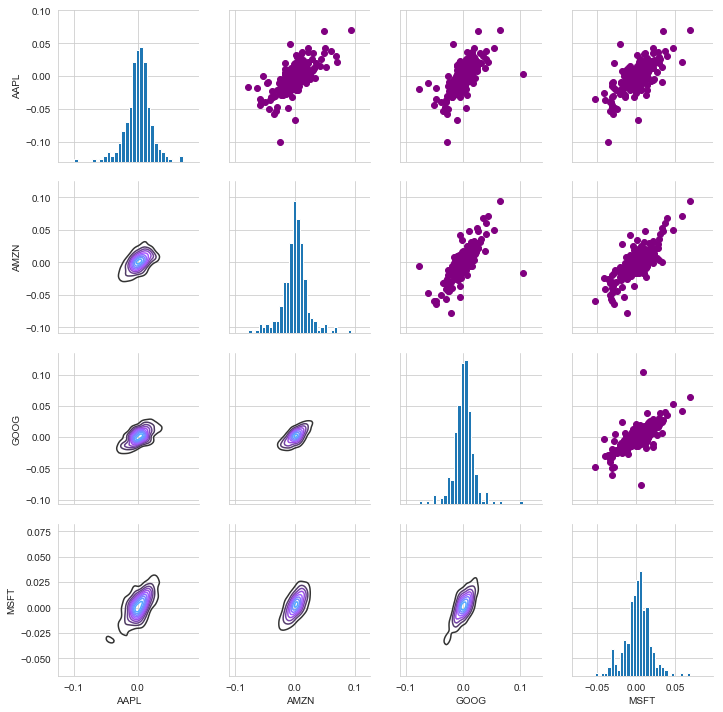

In [19]:
# PairGrid()を使うと上側と下側で別の種類のグラフが描ける

# データを格納しているDataFrameを引数にしてPairGridを作る
returns_fig = sns.PairGrid(tech_rets.dropna())

# 右上側には散布図を描く
returns_fig.map_upper(plt.scatter,color='purple')

# 左下側にはKDEプロットを描く
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# 対角線上にはヒストグラムを描く
returns_fig.map_diag(plt.hist,bins=30)

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


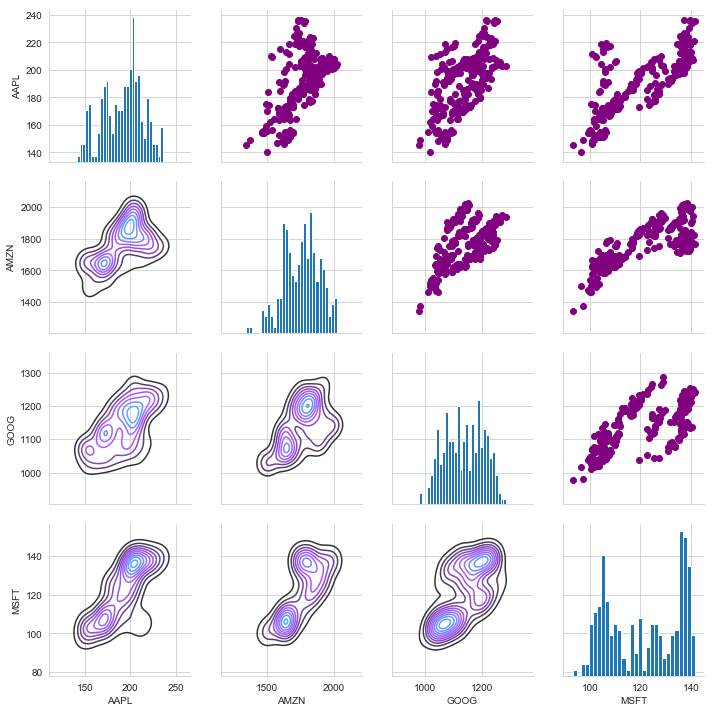

In [20]:
# 終値について同様に
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

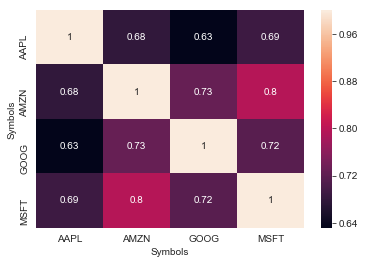

In [21]:
# 相関関係を示したヒートマップ
sns.heatmap(tech_rets.corr(),annot=True)

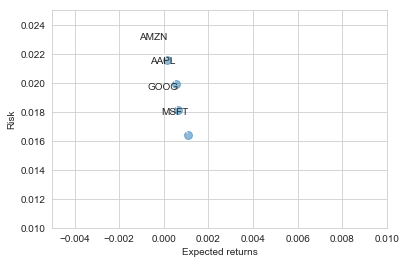

In [23]:
# リスクの基本はその株価の変動幅
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=area)

plt.ylim([0.01,0.025])
plt.xlim([-0.005,0.01])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

# グラフにアノテーションを付ける
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (0, 20),
        textcoords = 'offset points', ha = 'right',
        arrowprops = dict(arrowstyle='-', connectionstyle = 'arc3'))

/Users/tsubasa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


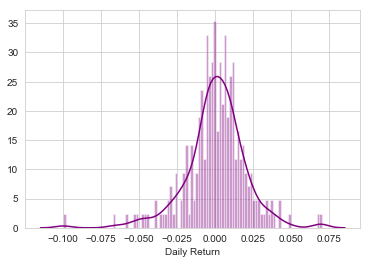

In [24]:
# NaNを取り除いてからKDE付きのヒストグラムを描く
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [25]:
# 5パーセンタイルの位置にある変動率は？
rets['AAPL'].quantile(0.05)

-0.031706554147198696

5パーセンタイルの位置にある変動率は、-3.17%。これは、95%の可能性で、日々の変動率がこれを下回らないことを意味する。

In [26]:
# 1年を基準にする
days = 365

# 1日分の差分
dt = 1 / days

# 日々の変動の平均を計算する
mu = rets.mean()['GOOG']

# Volatility: 株価の変動の振れ幅 を変動の標準偏差で計算する
sigma = rets.std()['GOOG']

最初の価格（starting price）と、日数、今計算した平均とボラティリティをつかって、簡単なモンテカルロ法を行う関数を作る

In [27]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' この関数は、シミュレーションの結果の価格リストを返す'''
    
    # 戻り値となる価格のリストを返す
    price = np.zeros(days)
    price[0] = start_price
    # ShockとDrift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # 指定された日数のところまで計算する
    for x in range(1, days):
        # Shockを計算する
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Driftを計算する
        drift[x] = mu * dt
        # これらを使って価格を計算する
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [28]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-22,1112.229980,1091.000000,1103.060059,1101.160034,1514200,1101.160034
2018-10-23,1107.890015,1070.000000,1080.890015,1103.689941,1848700,1103.689941
2018-10-24,1106.119995,1048.739990,1104.250000,1050.709961,1982400,1050.709961
2018-10-25,1110.979980,1069.550049,1071.790039,1095.569946,2545800,1095.569946
2018-10-26,1106.530029,1034.089966,1037.030029,1071.469971,4187600,1071.469971


In [29]:
GOOG.iloc[0,5]

1101.1600341796875

Text(0.5,1,'Monte Carlo Analysis for Google')

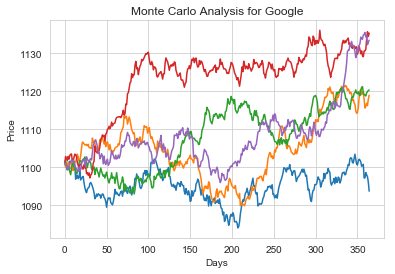

In [30]:
# 最初の終値から始める
start_price = GOOG.iloc[0,5]

for run in range(5):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [31]:
# 回数を指定
runs = 10000

# 結果を保持するarray
simulations = np.zeros(runs)

# これは表示のオプション
np.set_printoptions(threshold=5)

for run in range(runs):
    # 最終的な値をシミュレーション結果として保持
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

(array([1., 0., 0., ..., 1., 0., 1.]),
 array([1033.90726121, 1034.61061054, 1035.31395986, ..., 1173.17042764,
        1173.87377696, 1174.57712629]),
 <a list of 200 Patch objects>)

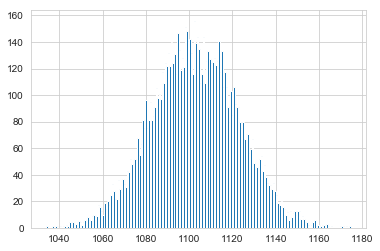

In [32]:
# 10000個の最終的なシミュレーション結果のヒストグラム
plt.hist(simulations,bins=200)

Text(0.5,1,'Final price distribution for Google Stock after 365 days')

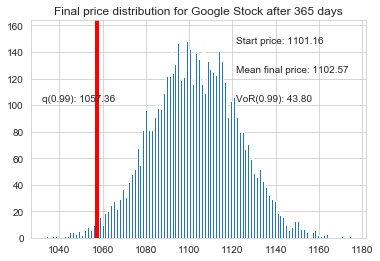

In [33]:
# 最終的な株価のヒストグラムを表示
plt.hist(simulations,bins=200)

# 1パーセンタイルの位置を設定
q = np.percentile(simulations, 1)

# プロットに追加情報を載せる

# 最初の株価
plt.figtext(0.6,0.8,s=f'Start price: {start_price:0.2f}')
# 最終的な株価の平均値
plt.figtext(0.6,0.7,f'Mean final price: {simulations.mean():0.2f}')

# Value at Risk
plt.figtext(0.6,0.6,f'VoR(0.99): {start_price-q:0.2f}')

# 1パーセンタイル
plt.figtext(0.15,0.6,f'q(0.99): {q:0.2f}')

# 1% クォンタイルに線を描く
plt.axvline(x=q,linewidth=4,color='r')

# タイトル
plt.title(f'Final price distribution for Google Stock after {days} days')